In [7]:
import glob
import os
import pandas as pd

# Set the path to the directory containing CSV files
path = 'trends/'

# Get a list of all CSV files in the directory
files = os.listdir(path)

for file in files:
    


['CA.csv',
 'CL.csv',
 'CO.csv',
 'DO.csv',
 'MX.csv',
 'NZ.csv',
 'PA.csv',
 'SV.csv',
 'SW.csv',
 'US.csv',
 'UY.csv']

In [12]:
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv('trends/' + file,  skiprows=1)
    df_temp.columns = ['date', file.split(".")[0]]
    df = pd.concat([df, df_temp], axis = 1)
df.head()

,date,CA,date,CL,date,CO,date,DO,date,MX,...,date,PA,date,SV,date,SW,date,US,date,UY
0,2018-04-15,72,2018-04-15,83,2018-04-15,69,2018-04-15,82,2018-04-15,73,...,2018-04-15,31,2018-04-15,46,2018-04-15,86,2018-04-15,79,2018-04-15,56
1,2018-04-22,67,2018-04-22,80,2018-04-22,67,2018-04-22,73,2018-04-22,69,...,2018-04-22,30,2018-04-22,37,2018-04-22,79,2018-04-22,79,2018-04-22,63
2,2018-04-29,69,2018-04-29,67,2018-04-29,68,2018-04-29,58,2018-04-29,66,...,2018-04-29,24,2018-04-29,17,2018-04-29,79,2018-04-29,78,2018-04-29,57
3,2018-05-06,64,2018-05-06,74,2018-05-06,65,2018-05-06,69,2018-05-06,69,...,2018-05-06,21,2018-05-06,31,2018-05-06,76,2018-05-06,80,2018-05-06,52
4,2018-05-13,70,2018-05-13,75,2018-05-13,67,2018-05-13,79,2018-05-13,71,...,2018-05-13,29,2018-05-13,40,2018-05-13,81,2018-05-13,73,2018-05-13,59


In [16]:
# Get the boolean mask of duplicate columns
duplicate_columns = df.columns.duplicated()
# Drop the duplicate columns from the dataframe
df = df.loc[:, ~duplicate_columns]
df

,date,CA,CL,CO,DO,MX,NZ,PA,SV,SW,US,UY
0,2018-04-15,72,83,69,82,73,75,31,46,86,79,56
1,2018-04-22,67,80,67,73,69,80,30,37,79,79,63
2,2018-04-29,69,67,68,58,66,70,24,17,79,78,57
3,2018-05-06,64,74,65,69,69,73,21,31,76,80,52
4,2018-05-13,70,75,67,79,71,77,29,40,81,73,59
...,...,...,...,...,...,...,...,...,...,...,...,...
256,2023-03-12,67,68,73,74,63,55,29,63,95,73,63
257,2023-03-19,68,69,64,80,58,57,34,55,86,74,68
258,2023-03-26,69,64,73,81,63,53,30,55,88,74,56
259,2023-04-02,67,58,62,64,53,50,30,35,84,73,51


In [23]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df.head()

,date,CA,CL,CO,DO,MX,NZ,PA,SV,SW,US,UY,month
0,2018-04-15,72,83,69,82,73,75,31,46,86,79,56,2018-04
1,2018-04-22,67,80,67,73,69,80,30,37,79,79,63,2018-04
2,2018-04-29,69,67,68,58,66,70,24,17,79,78,57,2018-04
3,2018-05-06,64,74,65,69,69,73,21,31,76,80,52,2018-05
4,2018-05-13,70,75,67,79,71,77,29,40,81,73,59,2018-05


In [24]:
df.columns

Index(['date', 'CA', 'CL', 'CO', 'DO', 'MX', 'NZ', 'PA', 'SV', 'SW', 'US',
       'UY', 'month'],
      dtype='object')

<AxesSubplot:xlabel='month'>

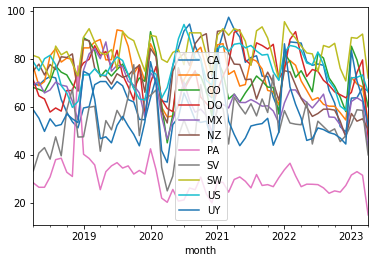

In [44]:
df_g = df.groupby('month')[['CA', 'CL', 'CO', 'DO', 'MX', 'NZ', 'PA', 'SV', 'SW', 'US',
       'UY']].mean()
df_g.plot()

In [45]:
import statsmodels.api as sm
import numpy as np

In [46]:
for country in df_g.columns:
    df_g[country].replace(0,0.01)
    df_g['log_' + country] = np.log(df_g[country])
    df_g['cycle_'+country ], df_g['trend_'+country ] = sm.tsa.filters.hpfilter(df_g['log_'+country] , 60)
    print(country)

CA
CL
CO
DO
MX
NZ
PA
SV
SW
US
UY


In [47]:
df_g.columns

Index(['CA', 'CL', 'CO', 'DO', 'MX', 'NZ', 'PA', 'SV', 'SW', 'US', 'UY',
       'log_CA', 'cycle_CA', 'trend_CA', 'log_CL', 'cycle_CL', 'trend_CL',
       'log_CO', 'cycle_CO', 'trend_CO', 'log_DO', 'cycle_DO', 'trend_DO',
       'log_MX', 'cycle_MX', 'trend_MX', 'log_NZ', 'cycle_NZ', 'trend_NZ',
       'log_PA', 'cycle_PA', 'trend_PA', 'log_SV', 'cycle_SV', 'trend_SV',
       'log_SW', 'cycle_SW', 'trend_SW', 'log_US', 'cycle_US', 'trend_US',
       'log_UY', 'cycle_UY', 'trend_UY'],
      dtype='object')

C:\Users\daniguvz\AppData\Local\Temp\ipykernel_15652\2994939918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend[col] = np.exp(df_trend[col])


<AxesSubplot:xlabel='month'>

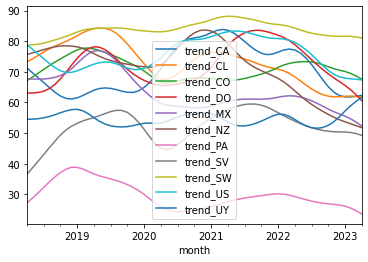

In [53]:
df_trend = df_g[[
       'trend_CA',  'trend_CL',
        'trend_CO',  'trend_DO',
       'trend_MX',  'trend_NZ',
       'trend_PA','trend_SV',
       'trend_SW', 'trend_US',
        'trend_UY']]
for col in df_trend.columns:
    df_trend[col] = np.exp(df_trend[col])
    
df_trend.plot()

In [54]:
df_trend.to_excel('real_estate_filtered.xlsx')